<a href="https://colab.research.google.com/github/SheekhaJ/DataScienceProjects/blob/master/Kaggle_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')
# drive.flush_and_unmount()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
%cd /content/gdrive/My\ Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [13]:
!pwd

/content/gdrive/My Drive/Kaggle


In [14]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/My Drive/Kaggle'

In [15]:
!pip install kaggle

In [16]:
!pip install kaggle upgrade

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [17]:
!kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
andrewmvd/data-analyst-jobs                                 Data Analyst Jobs                                  2MB  2020-07-14 08:37:57           1569  
vzrenggamani/hanacaraka                                     Aksara Jawa / Hanacaraka                           9MB  2020-07-10 15:09:31             50  
mrgeislinger/bart-ridership                                 BART Ridership                                   325MB  2020-07-09 22:28:07            174  
moezabid/zillow-all-homes-data                              Zillow All Homes Data                              5MB  2020-07-18 11:44:48            667  
mrmorj/restaurant-recommendation-challenge                  Restaurant Recommendat

In [18]:
!kaggle competitions download -c digit-recognizer

 82% 5.00M/6.09M [00:00<00:00, 51.9MB/s]
100% 6.09M/6.09M [00:00<00:00, 38.8MB/s]
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
 55% 5.00M/9.16M [00:00<00:00, 52.4MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.2MB/s]


Note that to change directory in Jupyter notebook, you use % and not ! magic command. ! is used for ls command.

In [19]:
!unzip \*.zip && rm *.zip

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

2 archives were successfully processed.


In [20]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

print(check_output(["ls"]).decode("utf8"))

kaggle.json
mnist
sample_data
sample_submission.csv
test.csv
train.csv



In [21]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f'train.shape: "{train.shape}"')

print(f'test.shape: "{test.shape}"')

train.shape: "(42000, 785)"
test.shape: "(28000, 784)"


In [22]:
print(f'train headers - {train.columns}')
print(f'test headers - {test.columns}')

train headers - Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
test headers - Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [45]:
print(type(train.iloc[0]))
train['label'][:20]

<class 'pandas.core.series.Series'>


0     1
1     0
2     1
3     4
4     0
5     0
6     7
7     3
8     5
9     3
10    8
11    9
12    1
13    3
14    3
15    1
16    2
17    0
18    7
19    5
Name: label, dtype: int64

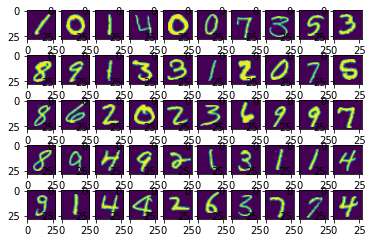

In [26]:
figure = plt.figure()
rows,cols=5,10
gs = figure.add_gridspec(rows,cols)

for i in range(rows):
  for j in range(cols):
    example = train.iloc[10*i+j,1:]
    # print(10*i+j,train.iloc[10*i+j,0])
    example = example.values.reshape([28,28])
    figure.add_subplot(gs[i,j])
    plt.imshow(example)

## Creating Pytorch MNISTDataset class

In [39]:
class MNISTDataset(Dataset):
  def __init__(self,csvFileName,train=True,transforms=None):
    self.mnistdf = pd.read_csv(csvFileName)
    self.transforms = transforms
    self.train = train

  def __len__(self):
    return len(self.mnistdf)

  def __getitem__(self,idx):
    if self.train:
      label,pixels = self.mnistdf.iloc[idx,0],torch.tensor(self.mnistdf.iloc[idx,1:])
      return label,pixels

    else:
      pixels = torch.tensor(self.mnistdf.iloc[idx,:])
      return pixels

In [40]:
trainDataSet = MNISTDataset('train.csv')
testDataSet = MNISTDataset('test.csv',train=False)

## Setting hyper-parameters

In [43]:
batchSize = 5

In [44]:
trainLoader = DataLoader(trainDataSet,batch_size=batchSize,shuffle=True,num_workers=4)
testLoader = DataLoader(testDataSet,batch_size=batchSize,shuffle=True,num_workers=4)